## Change the data to a readable form

In [3]:
# recover the table in the image‘74442072.3.jpg’ through using ElemenTree to deal with xml file'74442072.34.xml'.

import xml.etree.ElementTree as ET

tree = ET.ElementTree(file='74442072.34.xml')
root = tree.getroot()

# It can be seen that there are 9 columns in the corresponding table in image'74442072.3.jpg'
# so I set 9 empty series to restore the data.
districts_series = []
total_series = []
population_series = []
persons_series = []
males_series = []
females_series = []
ratiopersons_series = []
ratiomales_series = []
ratiofemales_series = []

# Define a function
# What this function do is to iterate each element in element.root
# elem is each root, target is the list of elem to be extracted
# Extract the content attribute of each elem attached to the target list
# The function of try & except is to allow mistakes and continue to run.

def get_ele_value(ele, target):
    for e in ele.iter():
        try:
            target.append(e.attrib['CONTENT'])
        except:
            continue
            
for elem in root.iter():
    try:
        
# Since the ID is a string, I need to present the non-numeric part and convert it to an int form
# so I can use the ID to determine which content needs to be placed in the same series,
# and I can get 9 sets of corresponding series.
        if 'p1_t' in elem.attrib['ID'] :
            cur = int(elem.attrib['ID'].split("t")[1])
            if cur >= 27 and cur <= 51:
                
# In addition, as you can see from image, some titles are split into several separate words
# so I need to fuse these words, so when elem>1, prove that they are in the XML file with the same textline.
# There are other elems of the same level, which proves that they should be put together
# so suggest a temporary array, put these elem into this
                if len(elem) > 1:
                    temp = []
                    get_ele_value(elem, temp)
                
#If elem>1, I need to use the for loop to iterate it again to get the corresponding elem(ratio,per, 10000, of...)
#Combine them with join and add the merged string to the corresponding series.
                    res = ' '.join(temp)
                    districts_series.append(res)
                else:
                    get_ele_value(elem, districts_series)
            if cur == 52:
                get_ele_value(elem, total_series)
            if cur >= 53 and cur <= 76:
                get_ele_value(elem, population_series)
            if cur == 77:
                get_ele_value(elem, total_series)
            if cur >= 79 and cur <= 103:
                get_ele_value(elem, persons_series)
            if cur == 104:
                get_ele_value(elem, total_series)  
            if cur >= 105 and cur <= 129:
                get_ele_value(elem, males_series)
            if cur == 130: 
                get_ele_value(elem, total_series)
            if cur >= 131 and cur <= 155:
                get_ele_value(elem, females_series)
            if cur == 156: 
                get_ele_value(elem, total_series)
            if cur >= 159 and cur <= 182:
                get_ele_value(elem, ratiopersons_series)
            if cur == 183: 
                get_ele_value(elem, total_series)
            if cur >= 184 and cur <= 207:
                get_ele_value(elem, ratiomales_series)
            if cur == 208: 
                get_ele_value(elem, total_series)
            if cur >= 209 and cur <= 232:
                get_ele_value(elem, ratiofemales_series)
            if cur == 233: 
                get_ele_value(elem, total_series)

    except:
        continue
        
        
#In this XML file, some horizontal characters can not be recognized into the XML structure, so I need to add manually.
population_series.insert(0,'Population according to census 1872')
ratiopersons_series.insert(0,'ratio.persons')
ratiomales_series.insert(0,'ratio.males')
ratiofemales_series.insert(0,'ratio.females')

print(districts_series)
print(total_series)
print(population_series)
print(persons_series)
print(males_series)
print(females_series)
print(ratiopersons_series)
print(ratiomales_series)
print(ratiofemales_series)


['Districts.', 'Khandeish', 'Nasik', 'Ahmednagar', 'Puna', 'Sholapur', 'Satara', 'Belgaum', 'Dharwar', 'Kaladgbi', 'Kanara', 'Ratnagiri', 'Kolaba', 'Bombay City', 'Tana', 'Surat', 'Broach', 'Kaira', 'Panch Mehals', 'Ahmedabad', 'Kurrachee', 'Hyderabad', 'Thur and Parkar', 'Sbikarpur', 'Upper Sind Frontier']
['Total', '16,228,774', '13,842', '10,012', '3,830', '8', '12', '5']
['Population according to census 1872', '1,028,642', '734,386', '773,938', '907,235', '662,986', '1,116,050', '938,750', '988,037', '816,037', '398,406', '1,019,136', '350,405', '644,405', '847,424', '607,087', '350,322', '782,733', '240,743', '829,637', '423,495', '721,947', '180,761', '776,227', '89,985']
['Persons.', '1,532', '718', '1,085', '1,090', '795', '1,321', '943', '1,155', '607', '158', '1,237', '444', '209', '705', '579', '188', '411', '114', '242', '81', '126', '8', '87', '7']
['Males.', '1,206', '560', '813', '825', '589', '975', '601', '708', '410', '99', '972', '333', '133', '491', '390', '129', '3

To verify whether the length of every column is the same, and then I can merge each column into the same table.

In [4]:
print(len(districts_series))
print(len(total_series))
print(len(population_series))
print(len(persons_series))
print(len(males_series))
print(len(females_series))
print(len(ratiopersons_series))
print(len(ratiomales_series))
print(len(ratiofemales_series))

25
8
25
25
25
25
25
25
25


In [5]:
import pandas as pd
import numpy as np

#put 9 series into a dataframe
#the first value of these series will be their key, and the rest of the element will be its value
d = {districts_series[0]: districts_series[1:], population_series[0]:population_series[1:], persons_series[0]:persons_series[1:], males_series[0]:males_series[1:], females_series[0]:females_series[1:], ratiopersons_series[0]:ratiopersons_series[1:], ratiomales_series[0]:ratiomales_series[1:], ratiofemales_series[0]:ratiofemales_series[1:]}
data = pd.DataFrame(data=d)

data

Districts. Population according to census 1872 Persons. Males.  \
0             Khandeish                           1,028,642    1,532  1,206   
1                 Nasik                             734,386      718    560   
2            Ahmednagar                             773,938    1,085    813   
3                  Puna                             907,235    1,090    825   
4              Sholapur                             662,986      795    589   
5                Satara                           1,116,050    1,321    975   
6               Belgaum                             938,750      943    601   
7               Dharwar                             988,037    1,155    708   
8              Kaladgbi                             816,037      607    410   
9                Kanara                             398,406      158     99   
10            Ratnagiri                           1,019,136    1,237    972   
11               Kolaba                             350,405      444    333   
12          Bombay City                             644,405      209    133   
13                 Tana                             847,424      705    491   
14                Surat                             607,087      579    390   
15               Broach                             350,322      188    129   
16                Kaira                             782,733      411    313   
17         Panch Mehals                             240,743      114     87   
18            Ahmedabad                             829,637      242    175   
19            Kurrachee                             423,495       81     57   
20            Hyderabad                             721,947      126     73   
21      Thur and Parkar                             180,761        8      8   
22            Sbikarpur                             776,227       87     61   
23  Upper Sind Frontier                              89,985        7      4   

   Females. ratio.persons ratio.males ratio.females  
0       326            15          23             7  
1       158            10          15             4  
2       272            14          21             7  
3       265            12          18             6  
4       206            12          17             6  
5       346            12          17             6  
6       342            10          13             7  
7       447            12          14             9  
8       197             7          10             5  
9        59             4           5             3  
10      265            12          20             5  
11      111            12          19             6  
12       76             3           3             3  
13      214             8          11             5  
14      189            10          12             6  
15       69             5           7             4  
16       98             5           7             3  
17       27             5           7             2  
18       67             3           4             2  
19       24             2           2             1  
20       53             2           2             2  
21        "             "           1             "  
22       26             1           1             1  
23        3             1           1             1

## Cleaning the data:
The data had some strange things in.

The dataframe consists of different series, so the type of data inside is all string, not int.
There have some error values in 'Females.', 'ratio.persons' and 'ratio.females' and 'tip', like '"'. I need to convert these values into '0' for the later count and make it more conveniently

Remove the " in the table

In [6]:
# Use a comma as a separator to separate strings into multiple strings without commas.
# Combine these strings through the join function to remove the comma.

def remove_commas(s):
    return ''.join(s.split(','))
data['Population according to census 1872'] = data['Population according to census 1872'].apply(remove_commas)
data['Persons.'] = data['Persons.'].apply(remove_commas)
data['Males.'] = data['Males.'].apply(remove_commas)
data =data.replace('"',0)
data

Districts. Population according to census 1872 Persons. Males.  \
0             Khandeish                             1028642     1532   1206   
1                 Nasik                              734386      718    560   
2            Ahmednagar                              773938     1085    813   
3                  Puna                              907235     1090    825   
4              Sholapur                              662986      795    589   
5                Satara                             1116050     1321    975   
6               Belgaum                              938750      943    601   
7               Dharwar                              988037     1155    708   
8              Kaladgbi                              816037      607    410   
9                Kanara                              398406      158     99   
10            Ratnagiri                             1019136     1237    972   
11               Kolaba                              350405      444    333   
12          Bombay City                              644405      209    133   
13                 Tana                              847424      705    491   
14                Surat                              607087      579    390   
15               Broach                              350322      188    129   
16                Kaira                              782733      411    313   
17         Panch Mehals                              240743      114     87   
18            Ahmedabad                              829637      242    175   
19            Kurrachee                              423495       81     57   
20            Hyderabad                              721947      126     73   
21      Thur and Parkar                              180761        8      8   
22            Sbikarpur                              776227       87     61   
23  Upper Sind Frontier                               89985        7      4   

   Females. ratio.persons ratio.males ratio.females  
0       326            15          23             7  
1       158            10          15             4  
2       272            14          21             7  
3       265            12          18             6  
4       206            12          17             6  
5       346            12          17             6  
6       342            10          13             7  
7       447            12          14             9  
8       197             7          10             5  
9        59             4           5             3  
10      265            12          20             5  
11      111            12          19             6  
12       76             3           3             3  
13      214             8          11             5  
14      189            10          12             6  
15       69             5           7             4  
16       98             5           7             3  
17       27             5           7             2  
18       67             3           4             2  
19       24             2           2             1  
20       53             2           2             2  
21        0             0           1             0  
22       26             1           1             1  
23        3             1           1             1

Change the string in the dataframe to the integer.

In [7]:
data['Population according to census 1872'] = pd.to_numeric(data['Population according to census 1872'])
data['Persons.'] = pd.to_numeric(data['Persons.'])
data['Males.'] = pd.to_numeric(data['Males.'])
data['Females.'] = pd.to_numeric(data['Females.'])
data['ratio.persons'] = pd.to_numeric(data['ratio.persons'])
data['ratio.males'] = pd.to_numeric(data['ratio.males'])
data['ratio.females'] = pd.to_numeric(data['ratio.females'])
data


Districts.  Population according to census 1872  Persons.  \
0             Khandeish                              1028642      1532   
1                 Nasik                               734386       718   
2            Ahmednagar                               773938      1085   
3                  Puna                               907235      1090   
4              Sholapur                               662986       795   
5                Satara                              1116050      1321   
6               Belgaum                               938750       943   
7               Dharwar                               988037      1155   
8              Kaladgbi                               816037       607   
9                Kanara                               398406       158   
10            Ratnagiri                              1019136      1237   
11               Kolaba                               350405       444   
12          Bombay City                               644405       209   
13                 Tana                               847424       705   
14                Surat                               607087       579   
15               Broach                               350322       188   
16                Kaira                               782733       411   
17         Panch Mehals                               240743       114   
18            Ahmedabad                               829637       242   
19            Kurrachee                               423495        81   
20            Hyderabad                               721947       126   
21      Thur and Parkar                               180761         8   
22            Sbikarpur                               776227        87   
23  Upper Sind Frontier                                89985         7   

    Males.  Females.  ratio.persons  ratio.males  ratio.females  
0     1206       326             15           23              7  
1      560       158             10           15              4  
2      813       272             14           21              7  
3      825       265             12           18              6  
4      589       206             12           17              6  
5      975       346             12           17              6  
6      601       342             10           13              7  
7      708       447             12           14              9  
8      410       197              7           10              5  
9       99        59              4            5              3  
10     972       265             12           20              5  
11     333       111             12           19              6  
12     133        76              3            3              3  
13     491       214              8           11              5  
14     390       189             10           12              6  
15     129        69              5            7              4  
16     313        98              5            7              3  
17      87        27              5            7              2  
18     175        67              3            4              2  
19      57        24              2            2              1  
20      73        53              2            2              2  
21       8         0              0            1              0  
22      61        26              1            1              1  
23       4         3              1            1              1

## Statistical Questions

In [8]:
total_Population = np.sum(data['Population according to census 1872'])
total_Persons = np.sum(data['Persons.'])
total_Males = np.sum(data['Males.'])
total_Females = np.sum(data['Females.'])

print('Population in total according to census 1872 is:',total_Population)
print('Total number of people infected with leprosy is:',total_Persons)
print('The number of males in total infected with leprosy is:',total_Males)
print('The number of females in total infected with leprosy is:',total_Females)

Population in total according to census 1872 is: 16228774
Total number of people infected with leprosy is: 13842
The number of males in total infected with leprosy is: 10012
The number of females in total infected with leprosy is: 3840


To find the largest number in 'Persons' column, and show the corresponding districts.

In [9]:
ddata = data.set_index('Districts.', inplace=False)
ddata =pd.DataFrame(ddata,dtype=np.int)
ddata

Population according to census 1872  Persons.  Males.  \
Districts.                                                                   
Khandeish                                        1028642      1532    1206   
Nasik                                             734386       718     560   
Ahmednagar                                        773938      1085     813   
Puna                                              907235      1090     825   
Sholapur                                          662986       795     589   
Satara                                           1116050      1321     975   
Belgaum                                           938750       943     601   
Dharwar                                           988037      1155     708   
Kaladgbi                                          816037       607     410   
Kanara                                            398406       158      99   
Ratnagiri                                        1019136      1237     972   
Kolaba                                            350405       444     333   
Bombay City                                       644405       209     133   
Tana                                              847424       705     491   
Surat                                             607087       579     390   
Broach                                            350322       188     129   
Kaira                                             782733       411     313   
Panch Mehals                                      240743       114      87   
Ahmedabad                                         829637       242     175   
Kurrachee                                         423495        81      57   
Hyderabad                                         721947       126      73   
Thur and Parkar                                   180761         8       8   
Sbikarpur                                         776227        87      61   
Upper Sind Frontier                                89985         7       4   

                     Females.  ratio.persons  ratio.males  ratio.females  
Districts.                                                                
Khandeish                 326             15           23              7  
Nasik                     158             10           15              4  
Ahmednagar                272             14           21              7  
Puna                      265             12           18              6  
Sholapur                  206             12           17              6  
Satara                    346             12           17              6  
Belgaum                   342             10           13              7  
Dharwar                   447             12           14              9  
Kaladgbi                  197              7           10              5  
Kanara                     59              4            5              3  
Ratnagiri                 265             12           20              5  
Kolaba                    111             12           19              6  
Bombay City                76              3            3              3  
Tana                      214              8           11              5  
Surat                     189             10           12              6  
Broach                     69              5            7              4  
Kaira                      98              5            7              3  
Panch Mehals               27              5            7              2  
Ahmedabad                  67              3            4              2  
Kurrachee                  24              2            2              1  
Hyderabad                  53              2            2              2  
Thur and Parkar             0              0            1              0  
Sbikarpur                  26              1            1              1  
Upper Sind Frontier         3              1            1              1

In [10]:
largest_persons = np.max(ddata['Persons.'])
largest_males = np.max(ddata['Males.'])
largest_females = np.max(ddata['Females.'])
print('The number of the largest Persons. is:',largest_persons,'and the corresponding district is',ddata['Persons.'].idxmax() )
print('The number of the largest males. is:',largest_males,'and the corresponding district is',ddata['Males.'].idxmax())
print('The number of the largest females. is:',largest_females,'and the corresponding district is',ddata['Females.'].idxmax())


The number of the largest Persons. is: 1532 and the corresponding district is Khandeish
The number of the largest males. is: 1206 and the corresponding district is Khandeish
The number of the largest females. is: 447 and the corresponding district is Dharwar


In [11]:
average_persons = np.mean(data['Persons.'])
average_males = np.mean(data['Males.'])
average_females = np.mean(data['Females.'])
print('the average number of people who infected the leprosy in 1872:',average_persons)
print('the average number of males who infected the leprosy in 1872:',average_males)
print('the average number of females who infected the leprosy in 1872:',average_females)      

if average_males > average_females:
    print('The number of males who infected the leprosy are more than the number of those females ')
else:
    print('The number of females who infected the leprosy are more than the number of males')

the average number of people who infected the leprosy in 1872: 576.75
the average number of males who infected the leprosy in 1872: 417.1666666666667
the average number of females who infected the leprosy in 1872: 160.0
The number of males who infected the leprosy are more than the number of those females 


## visualization


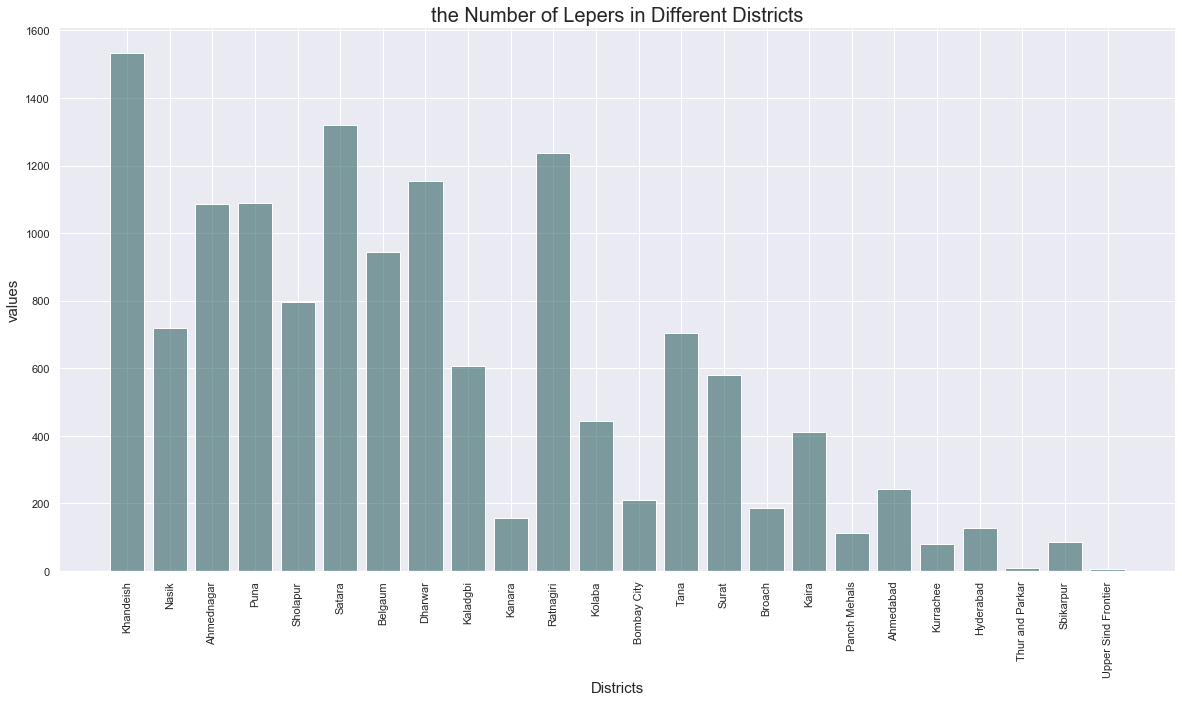

In [15]:
#What is the distribution of numbers of lepers in different districts?

# libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
 
# set label and value
label = data['Districts.'].unique()
height = data['Persons.'].tolist()

 
# Create bars and choose color
plt.bar(label, height,color=(0.2, 0.4, 0.4, 0.6))
 
# Add title and axis names
plt.title('the Number of Lepers in Different Districts',fontsize=20, fontweight=6)
plt.xlabel('Districts',fontsize=15, fontweight=2)
plt.xticks(rotation=90)
plt.ylabel('values',fontsize=15, fontweight=2)


#Set figure size
sns.set(rc={'figure.figsize':(20,10)})

# #Set color
# sns.palplot(sns.color_palette("Paired")) 

# Show graphic
plt.show()



2. Show the relationship between the number of different genders and different districts¶

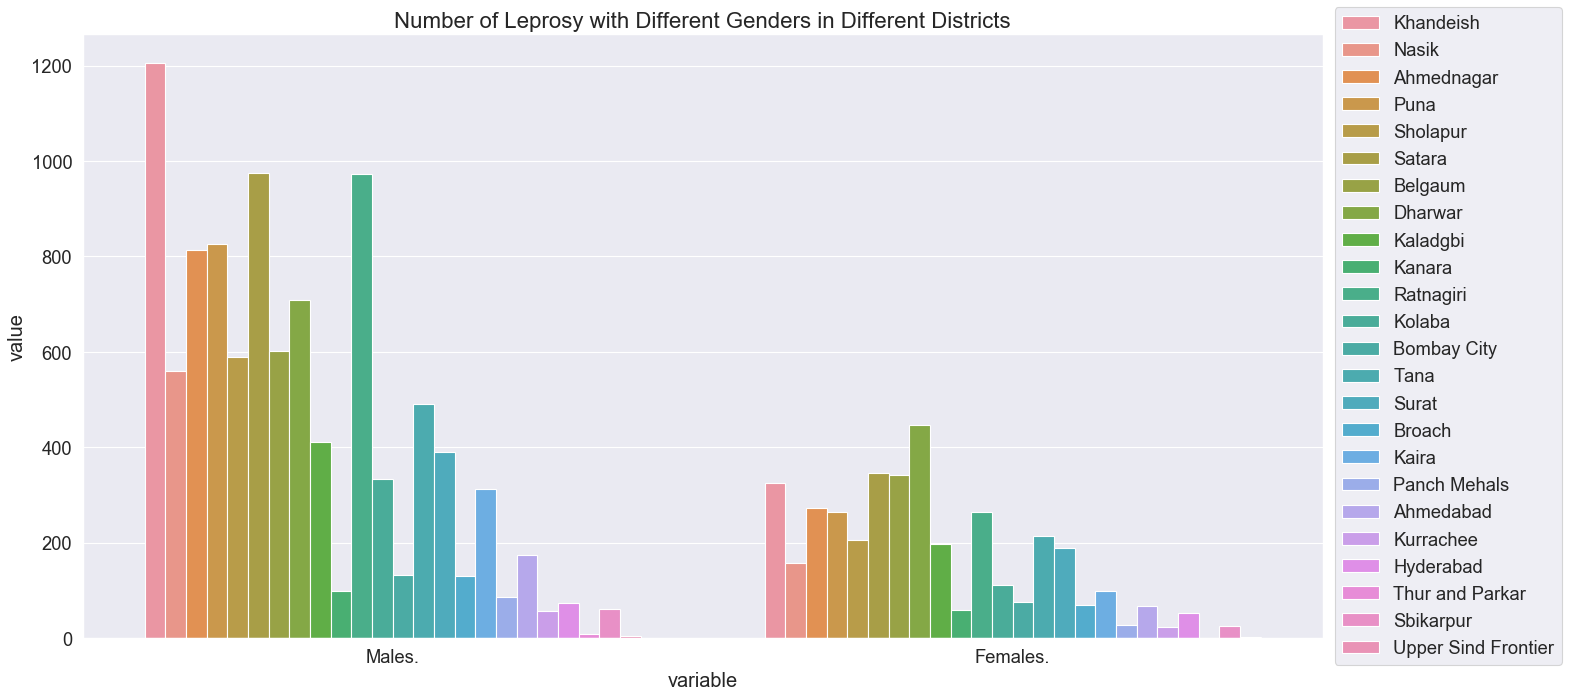

In [16]:
# Change the font size
sns.set(font_scale=1.5) 

# Change the size of the chart
plt.figure(figsize=(20, 10), dpi = 80)

# Use melt to reshape the data
# And then get a new dataset, with a column for whether is a female or a male, with a column for the value, and a type column for the districts
newdata = data.melt(id_vars=['Districts.'], value_vars=['Males.','Females.'])

# Creat barplot
sns.barplot(x = 'variable', y = 'value', data=newdata, hue='Districts.', ci =0)

# Adjust the postion of the hue label
plt.legend(loc="center right", bbox_to_anchor=(1.2,0,0,1))
plt.title('Number of Leprosy with Different Genders in Different Districts',fontsize=20, fontweight=6)

plt.show()


3. Visualize differences in the number of men and women between different regions

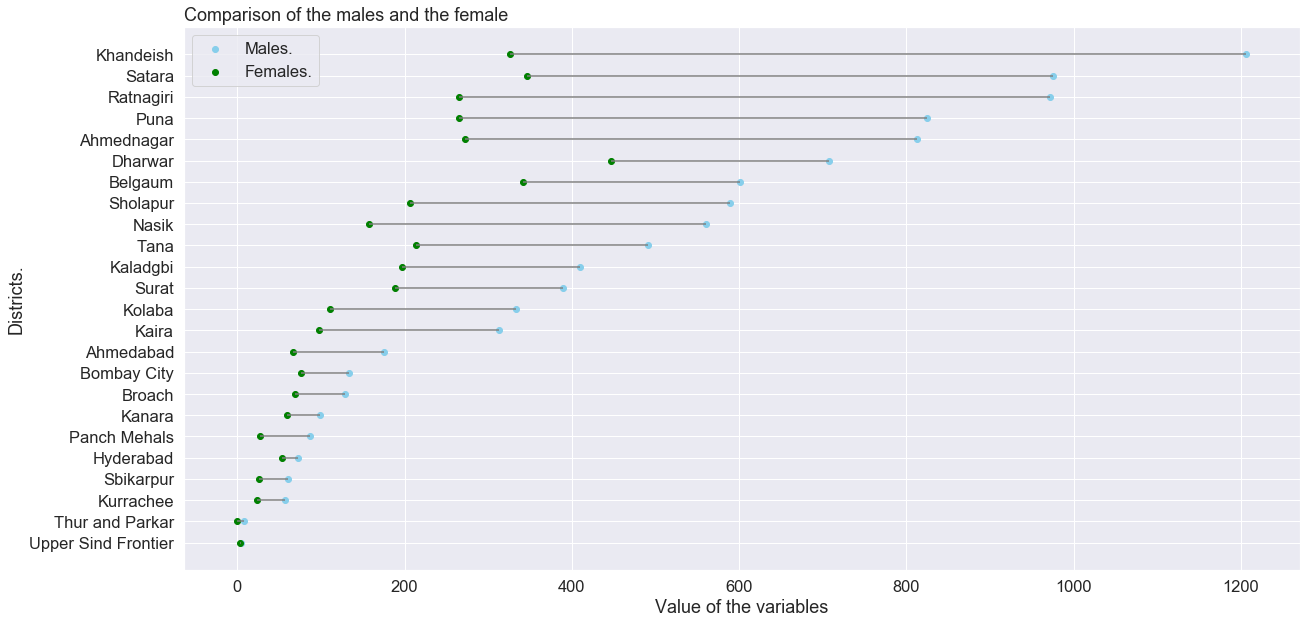

In [17]:
import seaborn as sns

# Create a dataframe
df = pd.DataFrame({'group':data['Districts.'], 'Males.':data['Males.'] , 'Females.':data['Females.']})
 
# Reorder it following the values of the first value:
ordered_df = df.sort_values(by='Males.')
my_range=range(1,len(df.index)+1)
 
# The vertical plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
plt.hlines(y=my_range, xmin=ordered_df['Males.'], xmax=ordered_df['Females.'], color='grey', alpha=1)
plt.scatter(ordered_df['Males.'], my_range, color='skyblue', alpha=1, label='Males.',)
plt.scatter(ordered_df['Females.'], my_range, color='green', alpha=1 , label='Females.')
plt.legend()
 
# Add title and axis names
plt.yticks(my_range, ordered_df['group'])
plt.title('Comparison of the males and the female', loc='left')
plt.xlabel('Value of the variables')
plt.ylabel('Districts.')
plt.show()

This is a very intuitive picture. It can be seen which of the regions with the largest and smallest difference in the number of people suffering from leprosy between males and females.

4. Show the most intuitive words in 'Distribution and causation of leprosy in British India' part through a word cloud and group these words into the shape of the leprosy virus

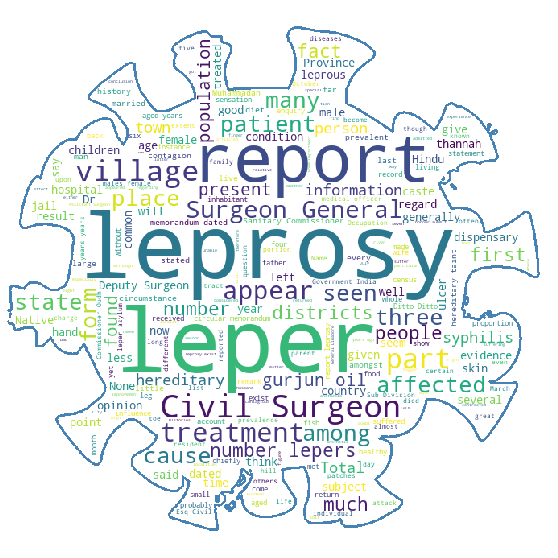

In [20]:
#Libraries
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline

mask= np.array(Image.open('virus.png'))

#Open the text
text=open("74457530.txt").read() 

#set the stopwords
sw=set(STOPWORDS)

#add stopwords manually
sw.add('disease')
sw.add('district')
sw.add('case')
sw.add('cases')
sw.add('one')
sw.add('may')
sw.add('two')

wc=WordCloud(stopwords=sw,max_words=250, mask=mask, background_color='white', contour_width=2, contour_color='steelblue',)
wc.generate(text)
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(wc)
plt.show()

5. Show the distribution of different districts and the number of lepers in Indian map through Heatmap

In [48]:
import numpy as np
import pandas as pd
import folium
import webbrowser
from folium.plugins import HeatMap

# Extract the required columns in dataframe
# Assign the value of these columns to the new list which will be needed for the heatmap
pop = (data['Population according to census 1872'].iloc[:24])
pop = pop.tolist()
value = (data['Persons.'].iloc[:24])
value = value.tolist()

# The districts in the tables are in the ancient names that are different from the modern names.
# Some areas contain many areas now, some areas are now canceled
# So I need to manually check the name of the area, what areas it contains, its latitude and longitude
# It can not use Google URI  to get the longitude and latitude automatically
ndata = pd.DataFrame({
'lat':[21.007658, 20.0000,19.0600 ,19.0600, 17.4012, 17.4200, 17.4159, 15.2136, 10.2000, 15.2008,
16.5900, 15.17019, 15.2682879, 29.528151, 21.1200, 21.4236, 20.2336, 22.45, 23.0148, 24.5200, 17.2400, 21.626673,
27.57,28.0000],
'lon':[75.562607, 73.4648, 74.4424, 74.4424, 75.5324, 74.0000, 73.5959, 75.0748, 76.4, 75.0925, 
73.1800, 75.0326, 75.0143051, 77.274319, 72.4912, 72.5812, 72.5448, 73.36, 72.3448, 67.0300, 78.2848, 71.263252,
68.39, 69.44],
'pop':pop,'value':value})

num = 24

# Get the dimension value of the dimension
# Get latitude value
lat = np.array(ndata["lat"][0:num],dtype=float) 

# Get longitude value
lon = np.array(ndata["lon"][0:num],dtype=float) 

# Get the population, convert to numpy float
pop = np.array(ndata['pop'][0:num],dtype=float) 

#Get the value, converted to numpy float
value = np.array(ndata['value'][0:num],dtype=float) 

# made the data into the [lat[i],lon[i],pop[i]] form
data1 = [[lat[i],lon[i],pop[i]] for i in range(num)]   

# Draw map, start zooming 5 times
map_osm = folium.Map(location=[1,1],zoom_start=5) 

## Add the heatmap to the previously created map
HeatMap(data1).add_to(map_osm)  

map_osm
